In [16]:
import csv
import matplotlib.pyplot as pyplot
from matplotlib.collections import BrokenBarHCollection

In [17]:
#import list of tests that corrspond to a determination as a cis-gene; replace the one that is being read incorrectly
ref = []
with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/Unique Tests-DirectRegulation.csv") as f:
    mydat = csv.reader(f)
    for line in mydat:
        line = line[0]
        ref.append(line.strip())
ref[0] = "?-galactosidase activity assay ( lacZ reporter fused to the promoter region of YEp367 carrying pERG11)"


In [18]:
#import all necessary information from respective files
chrom, telom, centrom, allgenesYESdirect, allgenesYESindirect, allgenesNO, temp, genome= [],[],[],[], [], [], [], []
a = 0

allgenesYES =[]

for i in range(0,17):
   telom.append([])
   centrom.append([])
   allgenesYESdirect.append([])
   allgenesYESindirect.append([])
   allgenesNO.append([])
   genome.append([])

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputchrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        chrom.append(int(line[2]))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputtelom.csv") as f:
    data = csv.reader(f)
    for line in data:
        telom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputcentrom.csv") as f:
    data = csv.reader(f)
    for line in data:
        centrom[int(line[0])-1].append((int(line[1]),int(line[2])))

with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/outputregulatedgenes2.csv") as f:
    data = csv.reader(f)
    for line in data:
        temp.append((line[0],line[1]))

print(len(temp)) #number of genetic interactions

                    


64357


In [19]:
x = 0
genome2 = []
#imports all the genes that are not mt into the system
with open("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/All Data/allgenesformatted1.csv") as f:
    data = csv.reader(f)
    for line in data:
       x = x+1
       if line[1] == "DUR1,2":
          line[1] = "DUR1"
       if line[1] == "ARG5,6":
          line[1] = "ARG5"
       if line[0] != "mt":
          genome2.append(line)
print(len(genome2)) #total genes


7064


In [20]:

cis = []
dels = []
for item in temp:
    if item[1] in ref:
        cis.append(item)
#print(cis[0:10])
#print(len(cis))
#temp = list(set(temp)-set(cis))
#print(len(temp))
#names = [x[0] for x in cis]
#for item in temp:
    #if item[0] in names:
     #   dels.append(item)
#print(len(dels))
#temp = list(set(temp)-set(dels))
#print(len(temp))

In [21]:
namer = [x[0] for x in temp]
gener = [x[1] for x in genome2]
ciser = [x[0] for x in cis]
cis2 = []
trans = []
for item in gener:
    if item in ciser:
        cis2.append(item)
for item in gener:
    if item in namer:
        trans.append(item)
trans = list(set(trans)-set(cis2))
rester = list(set(gener)-set(trans)-set(cis2))
print(len(trans), len(cis2), len(rester)) #trans, cis, not regulated count

'''
            if itemer[1] in ref:
               allgenesYESdirect[int(line[0])-1].append((int(line[2]),int(line[3])))
               not1.append(line[1])
               ind = temp.index(itemer)
               del temp[ind]
            else :
'''
'''
    else:
         if line[1] in temp:
             allgenesYES.append((int(line[2]),int(line[3])))
             not1.append(line[1])
         else:
             allgenesNO[16].append((int(line[2]),int(line[3])))

print(x)
'''  
print("done")

6057 253 754
done


In [22]:
genome3 = genome2
#we are now getting loci instead of only names
for line in genome3:
        if line[1] in cis2: 
               allgenesYESdirect[int(line[0])-1].append((int(line[2]),int(line[3])))
        elif line[1] in trans:
               allgenesYESindirect[int(line[0])-1].append((int(line[2]),int(line[3])))
        else:
               allgenesNO[int(line[0])-1].append((int(line[2]),int(line[3])))

In [23]:
#get rid of duplicates if any
allgenesYESdirect = [list(set(chromo)) for chromo in allgenesYESdirect]
allgenesYESindirect = [list(set(chromo)) for chromo in allgenesYESindirect]
allgenesNO = [list(set(chromo)) for chromo in allgenesNO]
#once again number of cis & trans genes
print(sum([len(listElem) for listElem in allgenesYESdirect]))
print(sum([len(listElem) for listElem in allgenesYESindirect]))

253
6057


In [24]:
print(sum([len(listElem) for listElem in allgenesYESdirect])) #final count cis
print(sum([len(listElem) for listElem in allgenesYESindirect])) #final count trans
print(sum([len(listElem) for listElem in allgenesNO])) #final count no regulation

253
6057
754


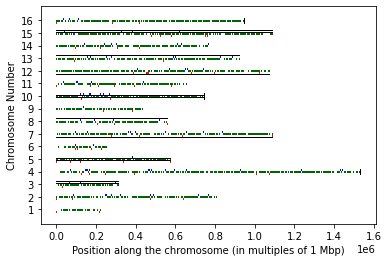

In [26]:
#Define the edges and staring/ending points of the chromosomes along with their sizes
yticks = []
yranges = []
yranges2 = []
yranges3 = []
yranges4 = []
yrange1, yrange2, yrange3, yranges5, yranges6 = [], [], [], [], []

for i in range(1,17):
   yranges.append([(i*30)-10.5, 15])
   yranges2.append([(i*30)-10.5, 0.5])
   yranges3.append([(i*30)-5.5,0.5])
   yranges4.append([(i*30)-12.5, 21])
   yranges5.append([(i*30)-0.5,0.5])
   yranges6.append([(i*30)+4.5,0.5])
   yrange1.append([(i*30)-10,5])
   yrange2.append([(i*30)-5,5])
   yrange3.append([(i*30),5])
   yticks.append((i*30)-1.5)


fig = pyplot.figure()
ax = fig.add_subplot(111)

#Plot the data. BrokenbarHcollection (matplotlib) takes inputs in the form of [(start,length), (start, length)...] for
#both x and y.
#This chunk plots the edges and ends of the chromosome, essentially everything in black as well
for i in range(0,16):
    coll = BrokenBarHCollection([(-1000,1000),(chrom[i], 1000)], yranges[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(coll)
    #col2 = BrokenBarHCollection(telom[i], yranges[i], facecolor="purple", zorder= 0.5)
    #ax.add_collection(col2)
    col3 = BrokenBarHCollection(centrom[i], yranges4[i], facecolor="brown", zorder= 0.5)
    ax.add_collection(col3)
    col4 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges2[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col4)
    col5 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges3[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col5)
    col6 = BrokenBarHCollection(allgenesYESdirect[i], yrange3[i], facecolor="blue", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col6)
    col7 = BrokenBarHCollection(allgenesNO[i], yrange1[i], facecolor="red", zorder= 0.2)
    ax.add_collection(col7)
    col8 = BrokenBarHCollection(allgenesYESindirect[i], yrange2[i], facecolor="darkgreen", zorder= 0.3)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col8)
    col9 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges5[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col9)
    col10 = BrokenBarHCollection([(-1000,chrom[i]+ 2000)], yranges6[i], facecolor="black", zorder= 0.5)#, clip_box = from_bounds(0, 20, 100000, 5))
    ax.add_collection(col10)

#Sets the labels
yticklabels = []
for a in range(1,17):
    yticklabels.append(a)

#basically plots and sets some final parameters to improve viewability
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels) 
pyplot.ylabel("Chromosome Number")
pyplot.xlabel("Position along the chromosome (in multiples of 1 Mbp)")
ax.axis('tight')
pyplot.savefig("/Users/pranjal/Desktop/Programming/GenomePlot/S. Cerevisae/S. Cerevisiae/SCerevisiae.pdf")

